# Implementasi Convulational Neural Network Pada Pengenalan Tulisan Tangan Aksara Sunda

_**Ridho (1610631170181) - Universitas Singaperbangsa Karawang**_

Notebook ini merupakan demo dari proses pengenalan aksara sunda menggunakan convolutional neural network.

In [1]:
import glob
import numpy as np
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import PIL.ImageOps as ImOps

## Preproccesing
Tahap ini mengubah data gambar kedalam bentuk array serta melakukan resize dan normalisasi

In [2]:
def prepare_dataset(path):
    x_train=[]
    y_train=[]
    label = 0
    for labels in os.listdir(path):
        if labels == 'ka':
            label = 0
        elif labels == 'ca':
            label = 1
        elif labels == 'ta':
            label = 2
        elif labels == 'pa':
            label = 3
        elif labels == 'ya':
            label = 4
        elif labels == 'wa':
            label = 5
        elif labels == 'ga':
            label = 6
        elif labels == 'ja':
            label = 7
        elif labels == 'da':
            label = 8
        elif labels == 'ba':
            label = 9
        elif labels == 'ra':
            label = 10
        elif labels == 'sa':
            label = 11
        elif labels == 'nga':
            label = 12
        elif labels == 'nya':
            label = 13
        elif labels == 'na':
            label = 14
        elif labels == 'ma':
            label = 15
        elif labels == 'la':
            label = 16
        elif labels== 'ha':
            label = 17
            
        all_images_path=glob.glob(path+labels+'/*.jpg')
        for img_path in all_images_path :
                img=load_img(img_path, target_size=(64,64))
                img = ImOps.invert(img)
                img=img_to_array(img)
                img=img/255.0
                x_train.append(img)
                y_train.append(label)
    return np.array(x_train),np.array(y_train)

In [3]:
x_train, y_train = prepare_dataset('train/')
x_test, y_test = prepare_dataset('test/')

In [4]:
print("Shape x_train :",x_train.shape)
print("Shape y_train:", y_train.shape)
print(" bShape x_train :",x_test.shape)
print("Shape y_train:", y_test.shape)

Shape x_train : (3780, 64, 64, 3)
Shape y_train: (3780,)
Shape x_train : (1620, 64, 64, 3)
Shape y_train: (1620,)


## Data Augmetation

Data augmentasi yang digunakan pada data platihan.
- rotasi = 10°
- Pergeseran(w,h) = (0.1, 0.1)
- Zoom = 0.3

In [5]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.3,
        horizontal_flip=False)

datagen.fit(x_train, augment=True)
data_test = datagen.flow(x_train, y_train, batch_size=5)

Using TensorFlow backend.


Train Augmetasi Data


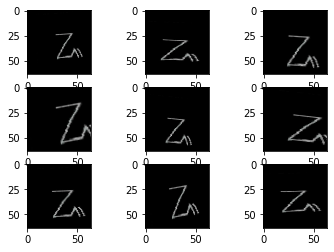

In [6]:
from numpy import expand_dims
import matplotlib.pyplot as plt

img = x_train[1250]
samples = expand_dims(img, 0)
it = datagen.flow(samples, batch_size=1)
print("Train Augmetasi Data")
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0]
    plt.imshow(image)
plt.show()

# Arsitektur CNN

Pada penelitian ini menggunakan 3 arsitektur CNN untuk klasifikasi aksara sunda
1. LeNet-5
2. Alexnet
3. Vgg-16

Setiap platihan dilakukan 15 epoch

### 1. LeNet-5

In [7]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam

def modelLeNet():
    model = Sequential()

    model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(64,64,3)))
    model.add(MaxPool2D(2,2))

    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(120, (5, 5), activation='relu'))

    model.add(Flatten())

    model.add(Dense(84, activation='relu'))

    model.add(Dense(18, activation = 'softmax'))
    model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])
    return model

modelLeNet().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 6)         456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 9720)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 84)               

In [8]:
LeNet_Aug = modelLeNet()
LeNet_without_Aug = modelLeNet()

In [9]:
history_Lenet = LeNet_without_Aug.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

Train on 3780 samples, validate on 1620 samples
Epoch 1/15
3780/3780 [==============================] - 12s 3ms/step - loss: 2.5942 - acc: 0.2254 - val_loss: 2.0765 - val_acc: 0.3796
Epoch 2/15
3780/3780 [==============================] - 11s 3ms/step - loss: 1.7605 - acc: 0.4709 - val_loss: 1.5243 - val_acc: 0.5265
Epoch 3/15
3780/3780 [==============================] - 11s 3ms/step - loss: 1.2315 - acc: 0.6365 - val_loss: 1.0632 - val_acc: 0.6809
Epoch 4/15
3780/3780 [==============================] - 13s 3ms/step - loss: 0.8298 - acc: 0.7585 - val_loss: 0.7568 - val_acc: 0.7753
Epoch 5/15
3780/3780 [==============================] - 12s 3ms/step - loss: 0.5497 - acc: 0.8394 - val_loss: 0.6397 - val_acc: 0.7895
Epoch 6/15
3780/3780 [==============================] - 12s 3ms/step - loss: 0.3933 - acc: 0.8868 - val_loss: 0.5646 - val_acc: 0.8265
Epoch 7/15
3780/3780 [==============================] - 14s 4ms/step - loss: 0.3026 - acc: 0.9106 - val_loss: 0.4488 - val_acc: 0.8537
Epoch 8

In [10]:
history_Lenet_Aug = LeNet_Aug.fit(data_test,validation_data=(x_test,y_test),
          steps_per_epoch=len(x_train)/5, epochs=15)

Epoch 1/15
756/756 [==============================] - 29s 38ms/step - loss: 2.6333 - acc: 0.1675 - val_loss: 1.7911 - val_acc: 0.4432
Epoch 2/15
756/756 [==============================] - 26s 35ms/step - loss: 1.7412 - acc: 0.4553 - val_loss: 0.8514 - val_acc: 0.7710
Epoch 3/15
756/756 [==============================] - 25s 33ms/step - loss: 1.1248 - acc: 0.6421 - val_loss: 0.4566 - val_acc: 0.8778
Epoch 4/15
756/756 [==============================] - 26s 34ms/step - loss: 0.8676 - acc: 0.7352 - val_loss: 0.3576 - val_acc: 0.9043
Epoch 5/15
756/756 [==============================] - 29s 38ms/step - loss: 0.6728 - acc: 0.7937 - val_loss: 0.3358 - val_acc: 0.8926
Epoch 6/15
756/756 [==============================] - 28s 37ms/step - loss: 0.5554 - acc: 0.8265 - val_loss: 0.1856 - val_acc: 0.9549
Epoch 7/15
756/756 [==============================] - 25s 33ms/step - loss: 0.4792 - acc: 0.8558 - val_loss: 0.1842 - val_acc: 0.9488
Epoch 8/15
756/756 [==============================] - 25s 33ms

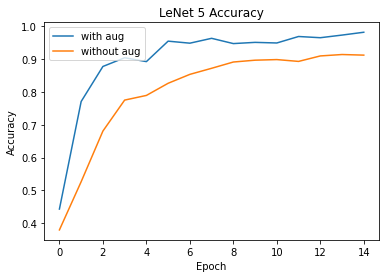

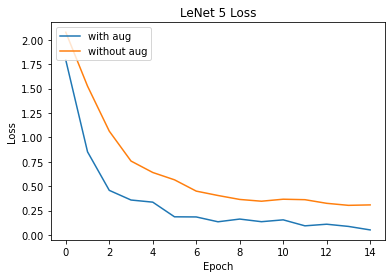

In [11]:
import matplotlib.pyplot as plt
from random import randint
import matplotlib.pyplot as plt
plt.plot(history_Lenet_Aug.history['val_acc'])
plt.plot(history_Lenet.history['val_acc'])
plt.title('LeNet 5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['with aug', 'without aug'], loc='upper left')
plt.show()

plt.plot(history_Lenet_Aug.history['val_loss'])
plt.plot(history_Lenet.history['val_loss'])
plt.title('LeNet 5 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['with aug', 'without aug'], loc='upper left')
plt.show()

### 2. Alexnet

In [12]:
def ALexNet():
    model = Sequential()
    model.add(Conv2D(96, (11,11), input_shape=(64,64,3), strides=(4,4), activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(256, (3,3),  strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Conv2D(384, (3,3),  strides=(1,1), padding='same',  activation='relu'))
    model.add(Conv2D(384, (3,3),  strides=(1,1), padding='same',  activation='relu'))
    model.add(Conv2D(256, (3,3),  strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPool2D(2,2))
    model.add(Flatten())
    model.add(Dense(2048, activation='relu'))
    model.add(Dense(2048, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(18, activation='softmax'))

    model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])
    return model
ALexNet().summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 14, 14, 96)        34944     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 96)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 256)         221440    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 384)         885120    
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 3, 384)         1327488   
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 256)        

In [13]:
ALexNet_no_aug = ALexNet()
ALexNet_Aug = ALexNet()

In [14]:
history_ALexNet = ALexNet_no_aug.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

Train on 3780 samples, validate on 1620 samples
Epoch 1/15
3780/3780 [==============================] - 46s 12ms/step - loss: 2.6118 - acc: 0.1413 - val_loss: 2.0783 - val_acc: 0.2994
Epoch 2/15
3780/3780 [==============================] - 46s 12ms/step - loss: 1.7662 - acc: 0.3770 - val_loss: 1.2143 - val_acc: 0.5716
Epoch 3/15
3780/3780 [==============================] - 45s 12ms/step - loss: 1.0806 - acc: 0.6114 - val_loss: 0.8458 - val_acc: 0.6981
Epoch 4/15
3780/3780 [==============================] - 45s 12ms/step - loss: 0.6984 - acc: 0.7444 - val_loss: 0.5441 - val_acc: 0.8136
Epoch 5/15
3780/3780 [==============================] - 45s 12ms/step - loss: 0.4894 - acc: 0.8317 - val_loss: 0.4373 - val_acc: 0.8432
Epoch 6/15
3780/3780 [==============================] - 45s 12ms/step - loss: 0.3927 - acc: 0.8632 - val_loss: 0.3958 - val_acc: 0.8605
Epoch 7/15
3780/3780 [==============================] - 45s 12ms/step - loss: 0.2417 - acc: 0.9153 - val_loss: 0.4007 - val_acc: 0.8611


In [15]:
history_ALexNet_Aug = ALexNet_Aug.fit(data_test,validation_data=(x_test,y_test),
          steps_per_epoch=len(x_train)/5, epochs=15)

Epoch 1/15
756/756 [==============================] - 140s 185ms/step - loss: 2.7051 - acc: 0.1042 - val_loss: 2.0193 - val_acc: 0.2784: 2.7147 - 
Epoch 2/15
756/756 [==============================] - 140s 186ms/step - loss: 1.6316 - acc: 0.3791 - val_loss: 1.0538 - val_acc: 0.5568
Epoch 3/15
756/756 [==============================] - 151s 200ms/step - loss: 0.9045 - acc: 0.6526 - val_loss: 0.3892 - val_acc: 0.8623
Epoch 4/15
756/756 [==============================] - 150s 198ms/step - loss: 0.5568 - acc: 0.7910 - val_loss: 0.2616 - val_acc: 0.9000
Epoch 5/15
756/756 [==============================] - 150s 198ms/step - loss: 0.4009 - acc: 0.8619 - val_loss: 0.1950 - val_acc: 0.9340
Epoch 6/15
756/756 [==============================] - 149s 198ms/step - loss: 0.3354 - acc: 0.8839 - val_loss: 0.1028 - val_acc: 0.9679
Epoch 7/15
756/756 [==============================] - 147s 194ms/step - loss: 0.2612 - acc: 0.9156 - val_loss: 0.1732 - val_acc: 0.9333
Epoch 8/15
756/756 [=================

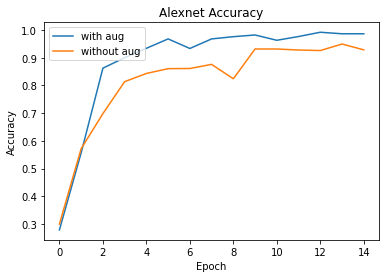

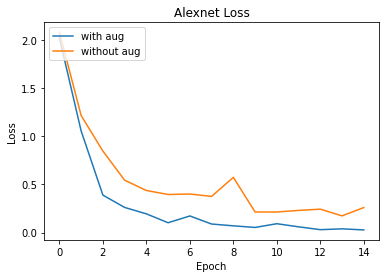

In [16]:
import matplotlib.pyplot as plt
from random import randint
import matplotlib.pyplot as plt
plt.plot(history_ALexNet_Aug.history['val_acc'])
plt.plot(history_ALexNet.history['val_acc'])
plt.title('Alexnet Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['with aug', 'without aug'], loc='upper left')
plt.show()

plt.plot(history_ALexNet_Aug.history['val_loss'])
plt.plot(history_ALexNet.history['val_loss'])
plt.title('Alexnet Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['with aug', 'without aug'], loc='upper left')
plt.show()

### 3. VGG16

In [23]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten,MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
local_weights_file = 'D:/Belajar/skripsi/ngalegena/pretrained/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
def modelVgg_16():
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape=(64, 64, 3)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(strides=2))
    
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(strides=2))
    
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(strides=2))
    
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(strides=2))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(strides=2))
    
    model.load_weights(local_weights_file)
    for layer in model.layers:
        layer.trainable = False
    model.add(Flatten())
    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(18, activation='softmax'))
    
    model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])
    return model

modelVgg16().summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 16, 16, 256)     

In [24]:
Vgg_Aug = modelVgg_16()
Vgg_without_Aug = modelVgg_16()

In [25]:
history_Vgg = Vgg_without_Aug.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test))

Train on 3780 samples, validate on 1620 samples
Epoch 1/15
3780/3780 [==============================] - 113s 30ms/step - loss: 2.5726 - acc: 0.2267 - val_loss: 2.0138 - val_acc: 0.6222
Epoch 2/15
3780/3780 [==============================] - 113s 30ms/step - loss: 1.8020 - acc: 0.5532 - val_loss: 1.4812 - val_acc: 0.7543
Epoch 3/15
3780/3780 [==============================] - 114s 30ms/step - loss: 1.3540 - acc: 0.7013 - val_loss: 1.1359 - val_acc: 0.8148
Epoch 4/15
3780/3780 [==============================] - 114s 30ms/step - loss: 1.0922 - acc: 0.7524 - val_loss: 0.9185 - val_acc: 0.8290
Epoch 5/15
3780/3780 [==============================] - 113s 30ms/step - loss: 0.9077 - acc: 0.7937 - val_loss: 0.7623 - val_acc: 0.8685
Epoch 6/15
3780/3780 [==============================] - 113s 30ms/step - loss: 0.7813 - acc: 0.8233 - val_loss: 0.6617 - val_acc: 0.8864
Epoch 7/15
3780/3780 [==============================] - 116s 31ms/step - loss: 0.6856 - acc: 0.8444 - val_loss: 0.5822 - val_acc: 

In [26]:
history_Vgg_Aug = Vgg_Aug.fit(data_test,validation_data=(x_test,y_test),
          steps_per_epoch=len(x_train)/5, epochs=15)

Epoch 1/15
756/756 [==============================] - 155s 205ms/step - loss: 2.2311 - acc: 0.3365 - val_loss: 1.4881 - val_acc: 0.6765
Epoch 2/15
756/756 [==============================] - 155s 206ms/step - loss: 1.3831 - acc: 0.6090 - val_loss: 0.9382 - val_acc: 0.8241
Epoch 3/15
756/756 [==============================] - 154s 204ms/step - loss: 1.0377 - acc: 0.7021 - val_loss: 0.6794 - val_acc: 0.8827
Epoch 4/15
756/756 [==============================] - 166s 220ms/step - loss: 0.8595 - acc: 0.7561 - val_loss: 0.5540 - val_acc: 0.8920
Epoch 5/15
756/756 [==============================] - 165s 218ms/step - loss: 0.7335 - acc: 0.7841 - val_loss: 0.4451 - val_acc: 0.9210
Epoch 6/15
756/756 [==============================] - 159s 211ms/step - loss: 0.6214 - acc: 0.8188 - val_loss: 0.3903 - val_acc: 0.9185
Epoch 7/15
756/756 [==============================] - 152s 201ms/step - loss: 0.5501 - acc: 0.8426 - val_loss: 0.3326 - val_acc: 0.9309
Epoch 8/15
756/756 [============================

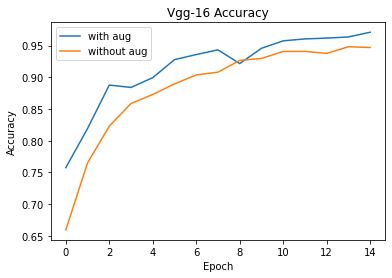

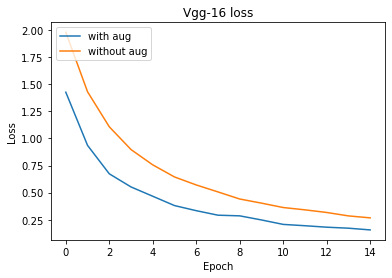

In [19]:
import matplotlib.pyplot as plt
from random import randint
import matplotlib.pyplot as plt
plt.plot(history_Vgg_Aug.history['val_acc'])
plt.plot(history_Vgg .history['val_acc'])
plt.title('Vgg-16 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['with aug', 'without aug'], loc='upper left')
plt.show()

plt.plot(history_Vgg_Aug.history['val_loss'])
plt.plot(history_Vgg .history['val_loss'])
plt.title('Vgg-16 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['with aug', 'without aug'], loc='upper left')
plt.show()